In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import MobileNet, VGG16, InceptionV3, ResNet50
from tensorflow.keras.applications.mobilenet import preprocess_input

In [2]:
def load_and_preprocess_images(folder_path, label):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img = load_img(os.path.join(folder_path, filename), target_size=(224, 224))
        img_array = img_to_array(img)
        img_array = preprocess_input(img_array) 
        images.append(img_array)
        labels.append(label)

    return np.array(images), np.array(labels)

healthy_dir = 'Healthy'
unhealthy_dir = 'Unhealthy'

healthy_images, healthy_labels = load_and_preprocess_images(healthy_dir, 1)
unhealthy_images, unhealthy_labels = load_and_preprocess_images(unhealthy_dir, 0)

X = np.concatenate((healthy_images, unhealthy_images), axis=0)
y = np.concatenate((healthy_labels, unhealthy_labels), axis=0)

In [6]:
def mobilenet_model():
    base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

def vgg16_model():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

def inceptionv3_model():
    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

def resnet50_model():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

In [7]:
def train_and_evaluate_model(X_train, X_test, y_train, y_test, model):
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    return history, test_loss, test_accuracy


In [8]:
splits = [(0.2, 0.8), (0.3, 0.7), (0.4, 0.6)] 
models = {
    'MobileNet': mobilenet_model,
    'VGG16': vgg16_model,
    'InceptionV3': inceptionv3_model,
    'ResNet50': resnet50_model
}

results = {}

for model_name, model_func in models.items():
    model_results = []
    for test_size, train_size in splits:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
        model = model_func()
        history, test_loss, test_accuracy = train_and_evaluate_model(X_train, X_test, y_train, y_test, model)
        model_results.append(test_accuracy)
    results[model_name] = model_results




Epoch 1/10


22/22 [==============================] - 10s 336ms/step - loss: 0.4932 - accuracy: 0.7641 - val_loss: 0.1954 - val_accuracy: 0.9249
Epoch 2/10
22/22 [==============================] - 6s 295ms/step - loss: 0.1261 - accuracy: 0.9551 - val_loss: 0.1303 - val_accuracy: 0.9538
Epoch 3/10
22/22 [==============================] - 7s 313ms/step - loss: 0.0682 - accuracy: 0.9841 - val_loss: 0.1028 - val_accuracy: 0.9595
Epoch 4/10
22/22 [==============================] - 7s 305ms/step - loss: 0.0454 - accuracy: 0.9913 - val_loss: 0.0998 - val_accuracy: 0.9595
Epoch 5/10
22/22 [==============================] - 7s 316ms/step - loss: 0.0308 - accuracy: 0.9971 - val_loss: 0.0813 - val_accuracy: 0.9711
Epoch 6/10
22/22 [==============================] - 7s 320ms/step - loss: 0.0221 - accuracy: 0.9986 - val_loss: 0.0864 - val_accuracy: 0.9653
Epoch 7/10
22/22 [==============================] - 7s 308ms/step - loss: 0.0159 - accuracy: 1.0000 - val_loss: 0.0745 - val_accuracy: 0.9769
E

In [9]:
accuracy_table = pd.DataFrame(results, index=['(80-20)', '(70-30)', '(60-40)'])

In [10]:
def plot_training_history(history, title):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(title)
    plt.show()

Epoch 1/10
22/22 [==============================] - 10s 329ms/step - loss: 0.4471 - accuracy: 0.7815 - val_loss: 0.2192 - val_accuracy: 0.9249
Epoch 2/10
22/22 [==============================] - 6s 290ms/step - loss: 0.1323 - accuracy: 0.9609 - val_loss: 0.1816 - val_accuracy: 0.9364
Epoch 3/10
22/22 [==============================] - 6s 292ms/step - loss: 0.0816 - accuracy: 0.9725 - val_loss: 0.1234 - val_accuracy: 0.9538
Epoch 4/10
22/22 [==============================] - 6s 286ms/step - loss: 0.0568 - accuracy: 0.9841 - val_loss: 0.1168 - val_accuracy: 0.9653
Epoch 5/10
22/22 [==============================] - 6s 290ms/step - loss: 0.0340 - accuracy: 0.9957 - val_loss: 0.1076 - val_accuracy: 0.9653
Epoch 6/10
22/22 [==============================] - 7s 306ms/step - loss: 0.0263 - accuracy: 0.9986 - val_loss: 0.0886 - val_accuracy: 0.9711
Epoch 7/10
22/22 [==============================] - 7s 306ms/step - loss: 0.0164 - accuracy: 1.0000 - val_loss: 0.0899 - val_accuracy: 0.9769
Epoch

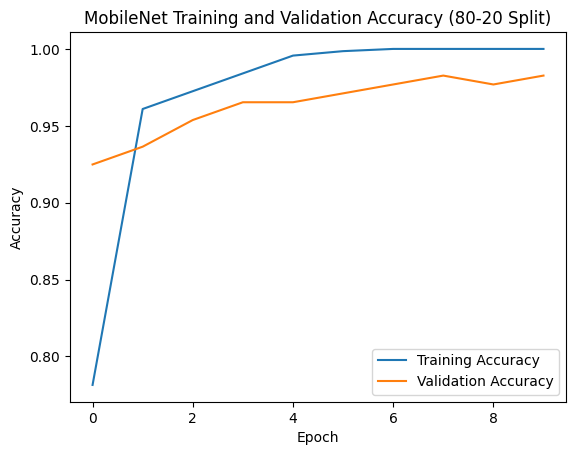

Epoch 1/10
19/19 [==============================] - 8s 377ms/step - loss: 0.4383 - accuracy: 0.7947 - val_loss: 0.1964 - val_accuracy: 0.9346
Epoch 2/10
19/19 [==============================] - 7s 353ms/step - loss: 0.1230 - accuracy: 0.9586 - val_loss: 0.1435 - val_accuracy: 0.9423
Epoch 3/10
19/19 [==============================] - 7s 350ms/step - loss: 0.0549 - accuracy: 0.9967 - val_loss: 0.1392 - val_accuracy: 0.9654
Epoch 4/10
19/19 [==============================] - 7s 353ms/step - loss: 0.0354 - accuracy: 0.9967 - val_loss: 0.1240 - val_accuracy: 0.9577
Epoch 5/10
19/19 [==============================] - 7s 350ms/step - loss: 0.0235 - accuracy: 1.0000 - val_loss: 0.1438 - val_accuracy: 0.9654
Epoch 6/10
19/19 [==============================] - 7s 352ms/step - loss: 0.0220 - accuracy: 1.0000 - val_loss: 0.1246 - val_accuracy: 0.9692
Epoch 7/10
19/19 [==============================] - 7s 352ms/step - loss: 0.0137 - accuracy: 1.0000 - val_loss: 0.1277 - val_accuracy: 0.9654
Epoch 

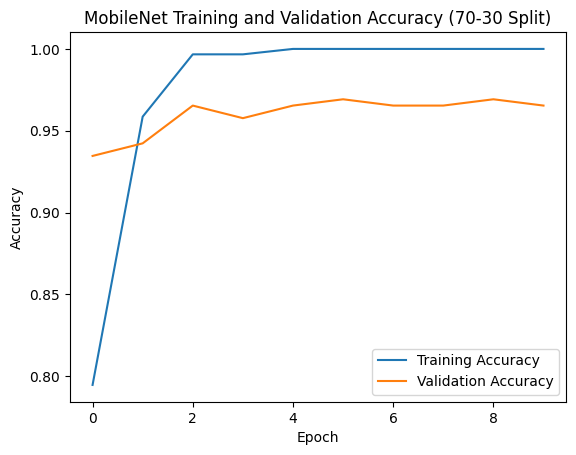

Epoch 1/10
17/17 [==============================] - 9s 471ms/step - loss: 0.3397 - accuracy: 0.8475 - val_loss: 0.1639 - val_accuracy: 0.9364
Epoch 2/10
17/17 [==============================] - 7s 414ms/step - loss: 0.1368 - accuracy: 0.9344 - val_loss: 0.1152 - val_accuracy: 0.9653
Epoch 3/10
17/17 [==============================] - 7s 400ms/step - loss: 0.0624 - accuracy: 0.9826 - val_loss: 0.1371 - val_accuracy: 0.9595
Epoch 4/10
17/17 [==============================] - 7s 408ms/step - loss: 0.0384 - accuracy: 0.9942 - val_loss: 0.1268 - val_accuracy: 0.9682
Epoch 5/10
17/17 [==============================] - 7s 407ms/step - loss: 0.0213 - accuracy: 1.0000 - val_loss: 0.0961 - val_accuracy: 0.9711
Epoch 6/10
17/17 [==============================] - 7s 412ms/step - loss: 0.0141 - accuracy: 1.0000 - val_loss: 0.1086 - val_accuracy: 0.9740
Epoch 7/10
17/17 [==============================] - 7s 413ms/step - loss: 0.0107 - accuracy: 1.0000 - val_loss: 0.0994 - val_accuracy: 0.9711
Epoch 

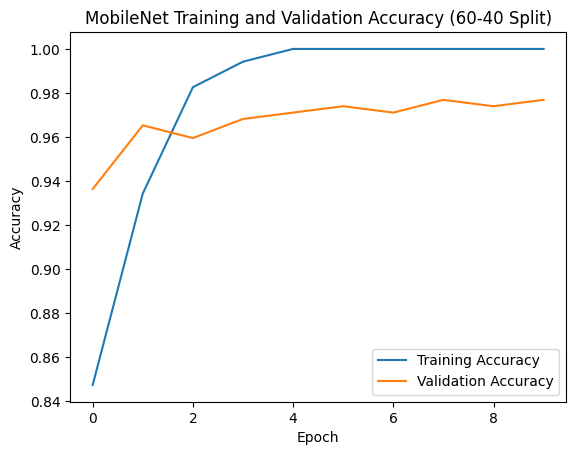

Epoch 1/10
22/22 [==============================] - 91s 4s/step - loss: 0.6347 - accuracy: 0.6498 - val_loss: 0.5803 - val_accuracy: 0.6994
Epoch 2/10
22/22 [==============================] - 86s 4s/step - loss: 0.5203 - accuracy: 0.7685 - val_loss: 0.4836 - val_accuracy: 0.7630
Epoch 3/10
22/22 [==============================] - 87s 4s/step - loss: 0.4387 - accuracy: 0.8119 - val_loss: 0.4062 - val_accuracy: 0.8382
Epoch 4/10
22/22 [==============================] - 87s 4s/step - loss: 0.3874 - accuracy: 0.8683 - val_loss: 0.3673 - val_accuracy: 0.8613
Epoch 5/10
22/22 [==============================] - 87s 4s/step - loss: 0.3390 - accuracy: 0.8871 - val_loss: 0.3340 - val_accuracy: 0.8671
Epoch 6/10
22/22 [==============================] - 87s 4s/step - loss: 0.3047 - accuracy: 0.8973 - val_loss: 0.3103 - val_accuracy: 0.8671
Epoch 7/10
22/22 [==============================] - 87s 4s/step - loss: 0.2819 - accuracy: 0.9103 - val_loss: 0.2914 - val_accuracy: 0.8786
Epoch 8/10
22/22 [==

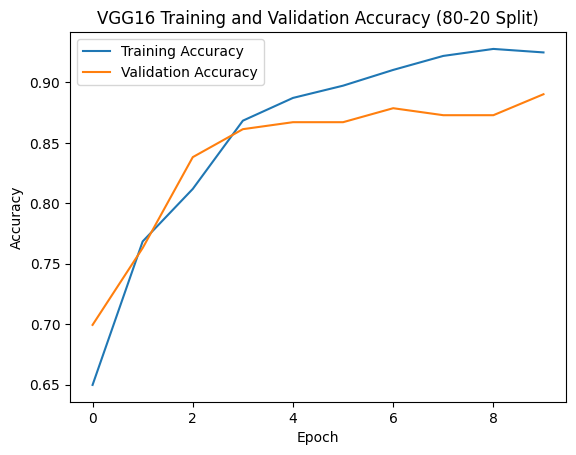

Epoch 1/10
19/19 [==============================] - 90s 5s/step - loss: 0.7244 - accuracy: 0.5298 - val_loss: 0.6314 - val_accuracy: 0.5846
Epoch 2/10
19/19 [==============================] - 89s 5s/step - loss: 0.6037 - accuracy: 0.6821 - val_loss: 0.5428 - val_accuracy: 0.7615
Epoch 3/10
19/19 [==============================] - 88s 5s/step - loss: 0.5316 - accuracy: 0.7616 - val_loss: 0.4886 - val_accuracy: 0.7962
Epoch 4/10
19/19 [==============================] - 89s 5s/step - loss: 0.4851 - accuracy: 0.7848 - val_loss: 0.4363 - val_accuracy: 0.8269
Epoch 5/10
19/19 [==============================] - 88s 5s/step - loss: 0.4373 - accuracy: 0.8295 - val_loss: 0.4046 - val_accuracy: 0.8423
Epoch 6/10
19/19 [==============================] - 88s 5s/step - loss: 0.4000 - accuracy: 0.8460 - val_loss: 0.3637 - val_accuracy: 0.8769
Epoch 7/10
19/19 [==============================] - 87s 5s/step - loss: 0.3645 - accuracy: 0.8791 - val_loss: 0.3381 - val_accuracy: 0.8885
Epoch 8/10
19/19 [==

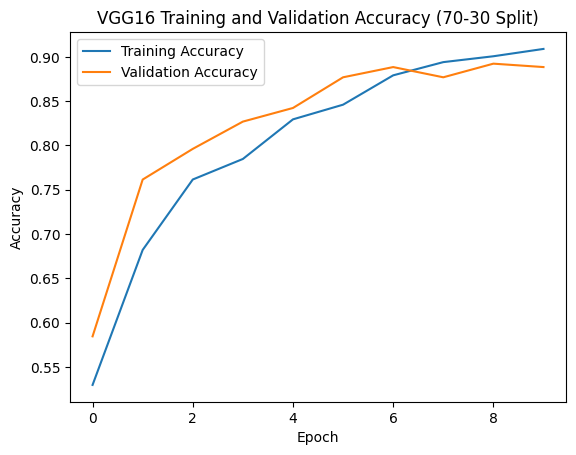

Epoch 1/10
17/17 [==============================] - 90s 5s/step - loss: 0.6455 - accuracy: 0.6332 - val_loss: 0.5608 - val_accuracy: 0.7601
Epoch 2/10
17/17 [==============================] - 88s 5s/step - loss: 0.5346 - accuracy: 0.7529 - val_loss: 0.5165 - val_accuracy: 0.7543
Epoch 3/10
17/17 [==============================] - 88s 5s/step - loss: 0.4841 - accuracy: 0.7896 - val_loss: 0.4583 - val_accuracy: 0.8150
Epoch 4/10
17/17 [==============================] - 87s 5s/step - loss: 0.4318 - accuracy: 0.8108 - val_loss: 0.4329 - val_accuracy: 0.8121
Epoch 5/10
17/17 [==============================] - 88s 5s/step - loss: 0.3938 - accuracy: 0.8649 - val_loss: 0.3775 - val_accuracy: 0.8584
Epoch 6/10
17/17 [==============================] - 89s 5s/step - loss: 0.3518 - accuracy: 0.8861 - val_loss: 0.3481 - val_accuracy: 0.8699
Epoch 7/10
17/17 [==============================] - 90s 5s/step - loss: 0.3269 - accuracy: 0.8861 - val_loss: 0.3315 - val_accuracy: 0.8728
Epoch 8/10
17/17 [==

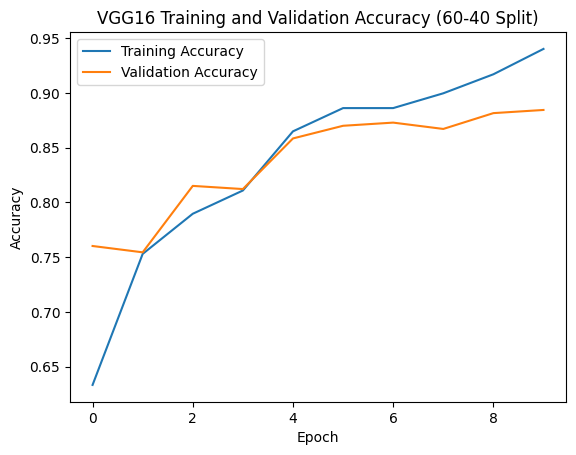

Epoch 1/10
22/22 [==============================] - 25s 959ms/step - loss: 0.6422 - accuracy: 0.7120 - val_loss: 0.4224 - val_accuracy: 0.8035
Epoch 2/10
22/22 [==============================] - 20s 895ms/step - loss: 0.3110 - accuracy: 0.8567 - val_loss: 0.2890 - val_accuracy: 0.8844
Epoch 3/10
22/22 [==============================] - 19s 892ms/step - loss: 0.2277 - accuracy: 0.9175 - val_loss: 0.2502 - val_accuracy: 0.9075
Epoch 4/10
22/22 [==============================] - 20s 896ms/step - loss: 0.1874 - accuracy: 0.9363 - val_loss: 0.2305 - val_accuracy: 0.9133
Epoch 5/10
22/22 [==============================] - 19s 886ms/step - loss: 0.1470 - accuracy: 0.9508 - val_loss: 0.2509 - val_accuracy: 0.9075
Epoch 6/10
22/22 [==============================] - 19s 875ms/step - loss: 0.1191 - accuracy: 0.9682 - val_loss: 0.2078 - val_accuracy: 0.9191
Epoch 7/10
22/22 [==============================] - 19s 891ms/step - loss: 0.1009 - accuracy: 0.9740 - val_loss: 0.2112 - val_accuracy: 0.9249

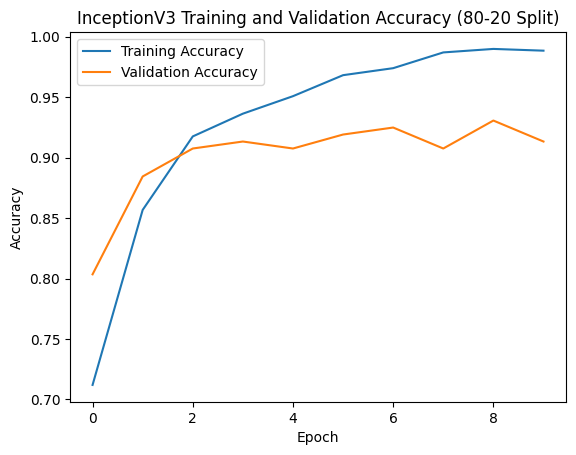

Epoch 1/10
19/19 [==============================] - 25s 1s/step - loss: 0.7568 - accuracy: 0.6341 - val_loss: 0.4703 - val_accuracy: 0.8192
Epoch 2/10
19/19 [==============================] - 18s 979ms/step - loss: 0.3739 - accuracy: 0.8278 - val_loss: 0.3397 - val_accuracy: 0.8538
Epoch 3/10
19/19 [==============================] - 18s 974ms/step - loss: 0.2675 - accuracy: 0.8940 - val_loss: 0.2876 - val_accuracy: 0.8885
Epoch 4/10
19/19 [==============================] - 18s 969ms/step - loss: 0.2060 - accuracy: 0.9189 - val_loss: 0.2730 - val_accuracy: 0.8923
Epoch 5/10
19/19 [==============================] - 18s 966ms/step - loss: 0.1499 - accuracy: 0.9536 - val_loss: 0.2619 - val_accuracy: 0.8962
Epoch 6/10
19/19 [==============================] - 18s 968ms/step - loss: 0.1309 - accuracy: 0.9719 - val_loss: 0.2740 - val_accuracy: 0.9000
Epoch 7/10
19/19 [==============================] - 19s 1s/step - loss: 0.1188 - accuracy: 0.9685 - val_loss: 0.2419 - val_accuracy: 0.9077
Epoch

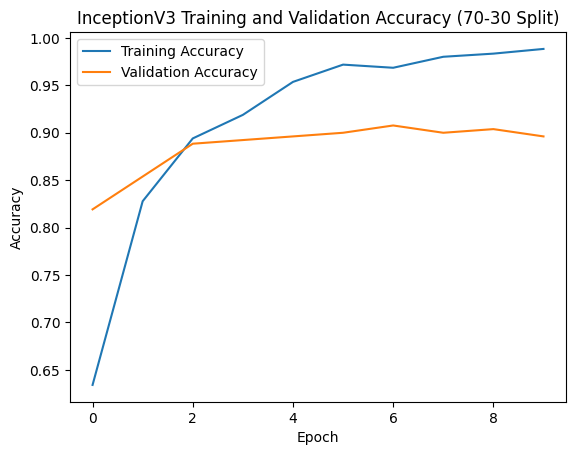

Epoch 1/10
17/17 [==============================] - 23s 1s/step - loss: 0.7873 - accuracy: 0.6197 - val_loss: 0.4427 - val_accuracy: 0.7861
Epoch 2/10
17/17 [==============================] - 18s 1s/step - loss: 0.3424 - accuracy: 0.8533 - val_loss: 0.2985 - val_accuracy: 0.8757
Epoch 3/10
17/17 [==============================] - 18s 1s/step - loss: 0.2812 - accuracy: 0.8707 - val_loss: 0.2600 - val_accuracy: 0.9133
Epoch 4/10
17/17 [==============================] - 18s 1s/step - loss: 0.2144 - accuracy: 0.9228 - val_loss: 0.2599 - val_accuracy: 0.8960
Epoch 5/10
17/17 [==============================] - 18s 1s/step - loss: 0.1781 - accuracy: 0.9363 - val_loss: 0.2377 - val_accuracy: 0.9075
Epoch 6/10
17/17 [==============================] - 18s 1s/step - loss: 0.1471 - accuracy: 0.9575 - val_loss: 0.2173 - val_accuracy: 0.9191
Epoch 7/10
17/17 [==============================] - 18s 1s/step - loss: 0.1158 - accuracy: 0.9633 - val_loss: 0.2212 - val_accuracy: 0.9104
Epoch 8/10
17/17 [==

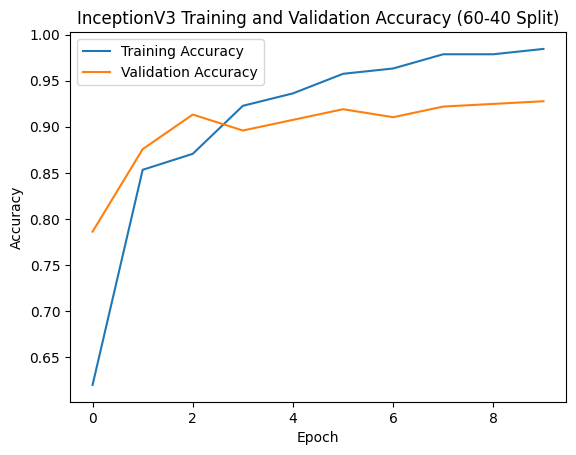

Epoch 1/10
22/22 [==============================] - 37s 2s/step - loss: 0.7498 - accuracy: 0.5152 - val_loss: 0.6396 - val_accuracy: 0.6185
Epoch 2/10
22/22 [==============================] - 32s 1s/step - loss: 0.6579 - accuracy: 0.5977 - val_loss: 0.6295 - val_accuracy: 0.6185
Epoch 3/10
22/22 [==============================] - 32s 1s/step - loss: 0.6234 - accuracy: 0.6585 - val_loss: 0.6042 - val_accuracy: 0.6647
Epoch 4/10
22/22 [==============================] - 32s 1s/step - loss: 0.5969 - accuracy: 0.6715 - val_loss: 0.5796 - val_accuracy: 0.6821
Epoch 5/10
22/22 [==============================] - 32s 1s/step - loss: 0.5771 - accuracy: 0.6845 - val_loss: 0.5815 - val_accuracy: 0.6994
Epoch 6/10
22/22 [==============================] - 311s 15s/step - loss: 0.5693 - accuracy: 0.7192 - val_loss: 0.5959 - val_accuracy: 0.6647
Epoch 7/10
22/22 [==============================] - 30s 1s/step - loss: 0.6116 - accuracy: 0.6614 - val_loss: 0.5782 - val_accuracy: 0.7052
Epoch 8/10
22/22 [

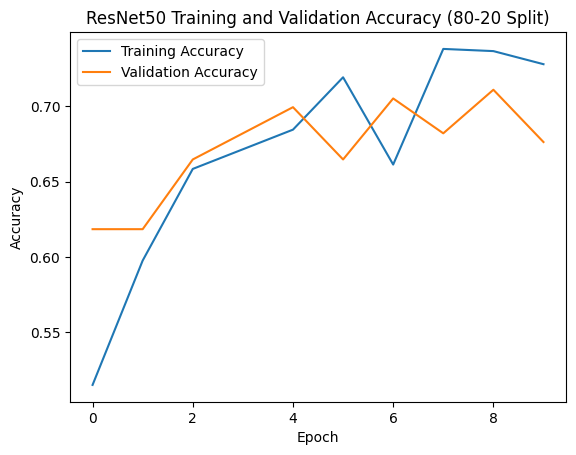

Epoch 1/10
19/19 [==============================] - 39s 2s/step - loss: 0.7516 - accuracy: 0.5132 - val_loss: 0.6271 - val_accuracy: 0.6615
Epoch 2/10
19/19 [==============================] - 35s 2s/step - loss: 0.6706 - accuracy: 0.5877 - val_loss: 0.6126 - val_accuracy: 0.6769
Epoch 3/10
19/19 [==============================] - 33s 2s/step - loss: 0.6183 - accuracy: 0.6705 - val_loss: 0.5922 - val_accuracy: 0.6923
Epoch 4/10
19/19 [==============================] - 32s 2s/step - loss: 0.6001 - accuracy: 0.6805 - val_loss: 0.5840 - val_accuracy: 0.7077
Epoch 5/10
19/19 [==============================] - 33s 2s/step - loss: 0.5892 - accuracy: 0.6788 - val_loss: 0.5956 - val_accuracy: 0.6769
Epoch 6/10
19/19 [==============================] - 33s 2s/step - loss: 0.5743 - accuracy: 0.6937 - val_loss: 0.5697 - val_accuracy: 0.7231
Epoch 7/10
19/19 [==============================] - 32s 2s/step - loss: 0.5590 - accuracy: 0.7169 - val_loss: 0.5655 - val_accuracy: 0.7154
Epoch 8/10
19/19 [==

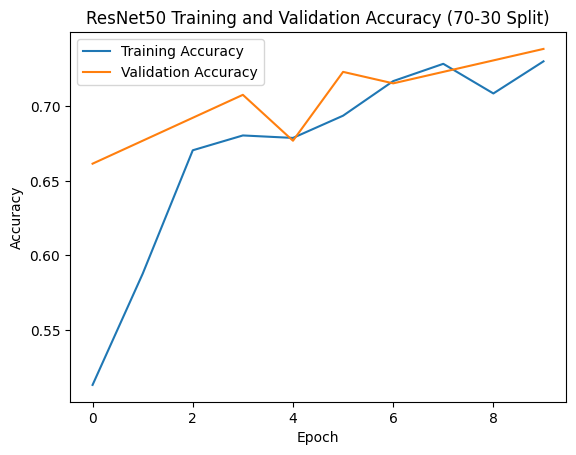

Epoch 1/10
17/17 [==============================] - 36s 2s/step - loss: 0.6893 - accuracy: 0.5405 - val_loss: 0.6233 - val_accuracy: 0.6734
Epoch 2/10
17/17 [==============================] - 34s 2s/step - loss: 0.6305 - accuracy: 0.6255 - val_loss: 0.6055 - val_accuracy: 0.6618
Epoch 3/10
17/17 [==============================] - 35s 2s/step - loss: 0.5967 - accuracy: 0.6660 - val_loss: 0.7115 - val_accuracy: 0.5549
Epoch 4/10
17/17 [==============================] - 34s 2s/step - loss: 0.6057 - accuracy: 0.6680 - val_loss: 0.5904 - val_accuracy: 0.7052
Epoch 5/10
17/17 [==============================] - 33s 2s/step - loss: 0.5719 - accuracy: 0.7124 - val_loss: 0.5917 - val_accuracy: 0.6821
Epoch 6/10
17/17 [==============================] - 33s 2s/step - loss: 0.5525 - accuracy: 0.7027 - val_loss: 0.5774 - val_accuracy: 0.6994
Epoch 7/10
17/17 [==============================] - 33s 2s/step - loss: 0.5417 - accuracy: 0.7239 - val_loss: 0.7025 - val_accuracy: 0.5809
Epoch 8/10
17/17 [==

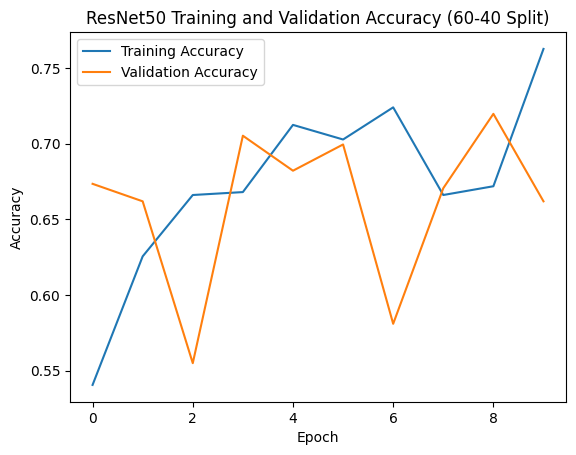

In [11]:
for model_name, model_func in models.items():
    for test_size, train_size in splits:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
        model = model_func()
        history, test_loss, test_accuracy = train_and_evaluate_model(X_train, X_test, y_train, y_test, model)
        plot_training_history(history, f'{model_name} Training and Validation Accuracy ({int(train_size*100)}-{int(test_size*100)} Split)')

In [13]:
print("Accuracy Table:")
print(accuracy_table)

Accuracy Table:
         MobileNet     VGG16  InceptionV3  ResNet50
(80-20)   0.976879  0.884393     0.913295  0.734104
(70-30)   0.973077  0.907692     0.892308  0.703846
(60-40)   0.976879  0.861272     0.921965  0.716763
